In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
<class 'numpy.ndarray'>


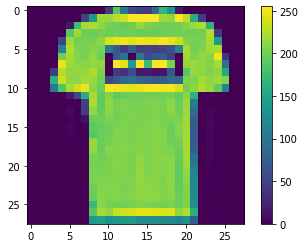

In [5]:
print(train_images.shape)
print(type(train_images))
train_images[0,23,23]  # let's have a look at one pixel
train_labels[:10]  # let's have a look at the first 10 training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3734 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [9]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[3.4994702e-08 2.2982516e-14 1.4253489e-11 9.8925080e-14 1.5252103e-09
 2.2989486e-03 9.5872444e-08 6.7438139e-03 5.2330229e-09 9.9095702e-01]
9
9


Pick a number: 45


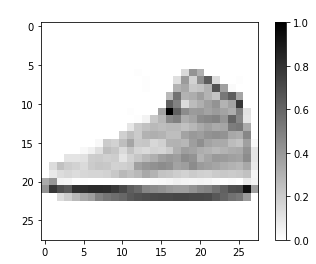

In [14]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.ylabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)